# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [5]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [6]:
!pip install palmerpenguins

In [7]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from palmerpenguins import load_penguins
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from plotnine import *

In [8]:
# Code Here


In [9]:
penguins = load_penguins()
penguins = penguins.dropna()
# X is a DataFrame
X = penguins.drop('bill_length_mm', axis = 1) # still a two-dimensional object

# y is a series
y = penguins['bill_length_mm'] # list of one thing

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [10]:
## preprocessing: One-hot-encoder
## Model spec: Linear REgression

lr = LinearRegression()
enc = OneHotEncoder() # helps automatically dummify variables

ct = ColumnTransformer([('dummify_s', enc, ['species']), # whatever you want to do to your testing
                        ('dummify_i', enc, ['island']),
                        ('dummify_sex', enc, ['sex'])]
)


# [('scaler, StandardScaler()), ('svc', SVC())]

my_pipeline = Pipeline(
    [('dummify_everything',ct),
    ('ols',lr)] # just labeling it as linear regression; ols stands for...idk
)

In [11]:
enc.fit_transform(penguins[['species']]) # do not need this step if you do the prior code

# don't really know what this stuff means

<333x3 sparse matrix of type '<class 'numpy.float64'>'
	with 333 stored elements in Compressed Sparse Row format>

In [12]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)

In [13]:
fitted_pipeline

Pipeline(steps=[('dummify_everything',
                 ColumnTransformer(transformers=[('dummify_s', OneHotEncoder(),
                                                  ['species']),
                                                 ('dummify_i', OneHotEncoder(),
                                                  ['island']),
                                                 ('dummify_sex',
                                                  OneHotEncoder(), ['sex'])])),
                ('ols', LinearRegression())])

In [14]:
y_predicted = fitted_pipeline.predict(X_test)

In [15]:
y_predicted

array([45.625 , 49.375 , 45.625 , 41.125 , 40.9375, 49.375 , 36.6875,
       51.    , 47.25  , 45.625 , 49.375 , 40.4375, 47.25  , 37.375 ,
       40.4375, 40.4375, 51.    , 45.625 , 45.625 , 49.375 , 37.375 ,
       36.6875, 51.    , 41.125 , 36.6875, 45.625 , 49.375 , 47.25  ,
       51.    , 49.375 , 41.125 , 45.625 , 41.125 , 49.375 , 49.375 ,
       40.4375, 45.625 , 45.625 , 47.25  , 36.6875, 49.375 , 49.375 ,
       40.4375, 51.    , 51.    , 49.375 , 36.6875, 40.4375, 40.4375,
       51.    , 49.375 , 51.    , 49.375 , 45.625 , 37.1875, 47.25  ,
       47.25  , 41.125 , 40.4375, 51.    , 40.4375, 49.375 , 47.25  ,
       45.625 , 45.625 , 36.6875, 45.625 , 51.    , 40.9375, 37.1875,
       49.375 , 45.625 , 37.375 , 36.6875, 47.25  , 37.375 , 40.4375,
       36.6875, 41.125 , 45.625 , 37.375 , 40.4375, 51.    , 45.625 ])

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [22]:
# Linear
X = penguins[['bill_length_mm']] # put two brackets to make it a DataFrame; # X is a DataFrame
y = penguins['bill_depth_mm'] # y is a series

X_train, X_test, y_train, y_test = train_test_split(X,y)

lr = LinearRegression()

# [('scaler, StandardScaler()), ('svc', SVC())]

my_pipeline = Pipeline([('ols',lr)] # just labeling it as linear regression; ols stands for...idk
)
# Fitted quadratic Model
fitted_pipeline_l = my_pipeline.fit(X_train, y_train)
fitted_pipeline_l

# Predict y values on Quadratic model
y_predicted_l = fitted_pipeline_l.predict(X_test)
y_predicted_l



array([16.72534375, 17.23191141, 17.41395917, 16.67785303, 17.84929076,
       17.77013956, 16.7490891 , 17.16067533, 17.61183716, 16.79657982,
       16.9073915 , 16.43248431, 17.39812893, 16.96279734, 17.73847908,
       16.7490891 , 17.44561965, 16.79657982, 16.96279734, 17.07360902,
       16.72534375, 17.48519525, 17.73056396, 17.29523237, 16.95488222,
       17.84137564, 17.80180004, 16.81241006, 17.73847908, 16.75700422,
       17.87303612, 16.68576815, 16.13170976, 17.83346052, 17.87303612,
       17.04194854, 17.25565677, 17.5880918 , 17.87303612, 17.84137564,
       17.75430932, 17.04194854, 17.44561965, 17.85720588, 17.12901485,
       16.89156126, 16.80449494, 16.73325887, 17.32689285, 16.70159839,
       16.84407054, 16.82032518, 17.08943926, 16.93905198, 17.46936501,
       16.77283446, 16.7886647 , 17.0656939 , 16.96279734, 17.35063821,
       17.34272309, 17.58017668, 17.42187429, 17.89678147, 16.7490891 ,
       16.82032518, 17.13692997, 17.667243  , 17.14484509, 17.85

In [ ]:
y_test

In [23]:
# Quadratic
poly = PolynomialFeatures(2)

# recipe, machine that generates linear regression, throw in your parts, variables
my_pipeline = Pipeline(
    [('quadratic', poly), ('ols', lr) ])

# Fitted quadratic Model
fitted_pipeline_q = my_pipeline.fit(X_train, y_train)
fitted_pipeline_q

# Predict y values on Quadratic model
y_predicted_q = fitted_pipeline_q.predict(X_test)
y_predicted_q



array([16.85204624, 16.87369814, 17.1249441 , 16.90111843, 18.24772068,
       17.98882728, 16.83079528, 16.81042592, 17.54404341, 16.79486362,
       16.74509111, 17.29421538, 17.09798642, 16.73809057, 17.89208352,
       16.83079528, 17.18177958, 16.79486362, 16.73809057, 16.75986095,
       16.85204624, 17.25829915, 17.86850594, 16.94648745, 16.73836062,
       18.22073629, 18.08946452, 16.78483314, 17.89208352, 16.82419831,
       18.33013389, 16.89233138, 18.09509901, 18.19399525, 18.33013389,
       16.74877398, 16.89916906, 17.48572117, 18.33013389, 18.22073629,
       17.93996871, 16.74877398, 17.18177958, 18.2749484 , 16.78863185,
       16.74928135, 16.78972671, 16.84471924, 16.98872234, 16.87548729,
       16.7676923 , 16.78018292, 16.76686449, 16.73963074, 17.22696129,
       16.8117344 , 16.80024387, 16.75672419, 16.73809057, 17.02295361,
       17.01129985, 17.46676711, 17.13878796, 18.41473719, 16.83079528,
       16.78018292, 16.79371535, 17.68864565, 16.7990422 , 18.27

In [24]:
# cubic

poly_c = PolynomialFeatures(3)

# recipe, machine that generates linear regression, throw in your parts, variables
my_pipeline_c = Pipeline(
    [('cubic', poly_c), ('ols', lr) ])

# Fitted quadratic Model
fitted_pipeline_c = my_pipeline_c.fit(X_train, y_train)
fitted_pipeline_c

# Predict y values on Quadratic model
y_predicted_c = fitted_pipeline_c.predict(X_test)
y_predicted_c



array([16.60943011, 16.9592344 , 17.37782218, 16.69201443, 18.16599611,
       18.08724288, 16.5778281 , 16.81573226, 17.82296738, 16.53288651,
       16.51382935, 17.59366874, 17.34020271, 16.54387175, 18.04453994,
       16.5778281 , 17.45286429, 16.53288651, 16.54387175, 16.66889775,
       16.60943011, 17.54561474, 18.03296757, 17.09919002, 16.53813045,
       18.16008252, 18.12380984, 16.52307418, 18.04453994, 16.56867447,
       18.18090596, 16.67640071, 20.05607183, 18.1537109 , 18.18090596,
       16.62527894, 17.01059873, 17.77419001, 18.18090596, 18.16008252,
       18.06662528, 16.62527894, 17.45286429, 18.1714434 , 16.75820103,
       16.50979313, 16.52766699, 16.59819764, 17.17215255, 16.6474177 ,
       16.51080437, 16.51909979, 16.69281132, 16.52806424, 17.50871281,
       16.55238809, 16.53874101, 16.65745459, 16.54387175, 17.22774555,
       17.20914815, 17.75753375, 17.39661973, 18.19139552, 16.5778281 ,
       16.51909979, 16.77217372, 17.92876865, 16.78642534, 18.17

In [25]:
# Degree 10

poly_d = PolynomialFeatures(10)

# recipe, machine that generates linear regression, throw in your parts, variables
my_pipeline_d = Pipeline(
    [('quadratic', poly_d), ('ols', lr) ])

# Fitted quadratic Model
fitted_pipeline_d = my_pipeline_d.fit(X_train, y_train)
fitted_pipeline_d

# Predict y values on Quadratic model
y_predicted_d = fitted_pipeline_d.predict(X_test)
y_predicted_d



array([17.23804311, 16.47624378, 17.63121329, 17.62189947, 18.05685906,
       18.33635849, 17.04553563, 16.10418256, 18.43482218, 16.67736523,
       16.01697962, 18.38381969, 17.5348585 , 15.837507  , 18.41007096,
       17.04553563, 17.81404904, 16.67736523, 15.837507  , 15.82264837,
       17.23804311, 18.01915037, 18.4245674 , 16.87038122, 15.85617908,
       18.08993304, 18.23934248, 16.56305929, 18.41007096, 16.98220084,
       17.95239605, 17.55900104, 14.81660423, 18.1220239 , 17.95239605,
       15.78085749, 16.6192962 , 18.38891078, 17.95239605, 18.08993304,
       18.37629028, 15.78085749, 17.81404904, 18.02286662, 15.97603618,
       16.08850199, 16.61956218, 17.17358862, 17.07712002, 17.43146034,
       16.35190984, 16.50795297, 15.85648214, 15.90057346, 17.94062707,
       16.85754498, 16.7363676 , 15.80890965, 15.837507  , 17.23239419,
       17.18076559, 18.37012176, 17.67825096, 17.84154353, 17.04553563,
       16.50795297, 16.00553517, 18.4795988 , 16.03676628, 18.02

In [37]:
X_test

,bill_length_mm
196,50.5
129,44.1
69,41.8
229,51.1
86,36.3
...,...
107,38.2
18,34.4
80,34.6
173,45.1


In [56]:
# Combine Arrays and make into a dataframe
#dataset = pd.DataFrame({'label': label, 'images': list(images)}, columns=['label', 'images'])
models = pd.DataFrame({'degree_10':y_predicted_d,'cubic':y_predicted_c,'quadratic':y_predicted_q,'linear':y_predicted_l,'y':y_test,'bill_length_mm':X_test['bill_length_mm']}, columns=['degree_10','cubic','quadratic','linear','y','bill_length_mm'])
models

,degree_10,cubic,quadratic,linear,y,bill_length_mm
196,17.238043,16.609430,16.852046,16.725344,15.9,50.5
129,16.476244,16.959234,16.873698,17.231911,18.0,44.1
69,17.631213,17.377822,17.124944,17.413959,19.4,41.8
229,17.621899,16.692014,16.901118,16.677853,16.3,51.1
86,18.056859,18.165996,18.247721,17.849291,19.5,36.3
...,...,...,...,...,...,...
107,18.465916,17.983340,17.776629,17.698903,20.0,38.2
18,17.340031,18.180318,18.806659,17.999678,18.4,34.4
80,17.414925,18.188426,18.743687,17.983848,17.2,34.6
173,16.069669,16.800948,16.804612,17.152760,14.5,45.1


In [ ]:
# Melt Data Frame to long form
#long_population = population.melt(id_vars=["country"], var_name="year", value_name="predictions")
#models = models.melt( var_name='model', value_name='predictions')
#models

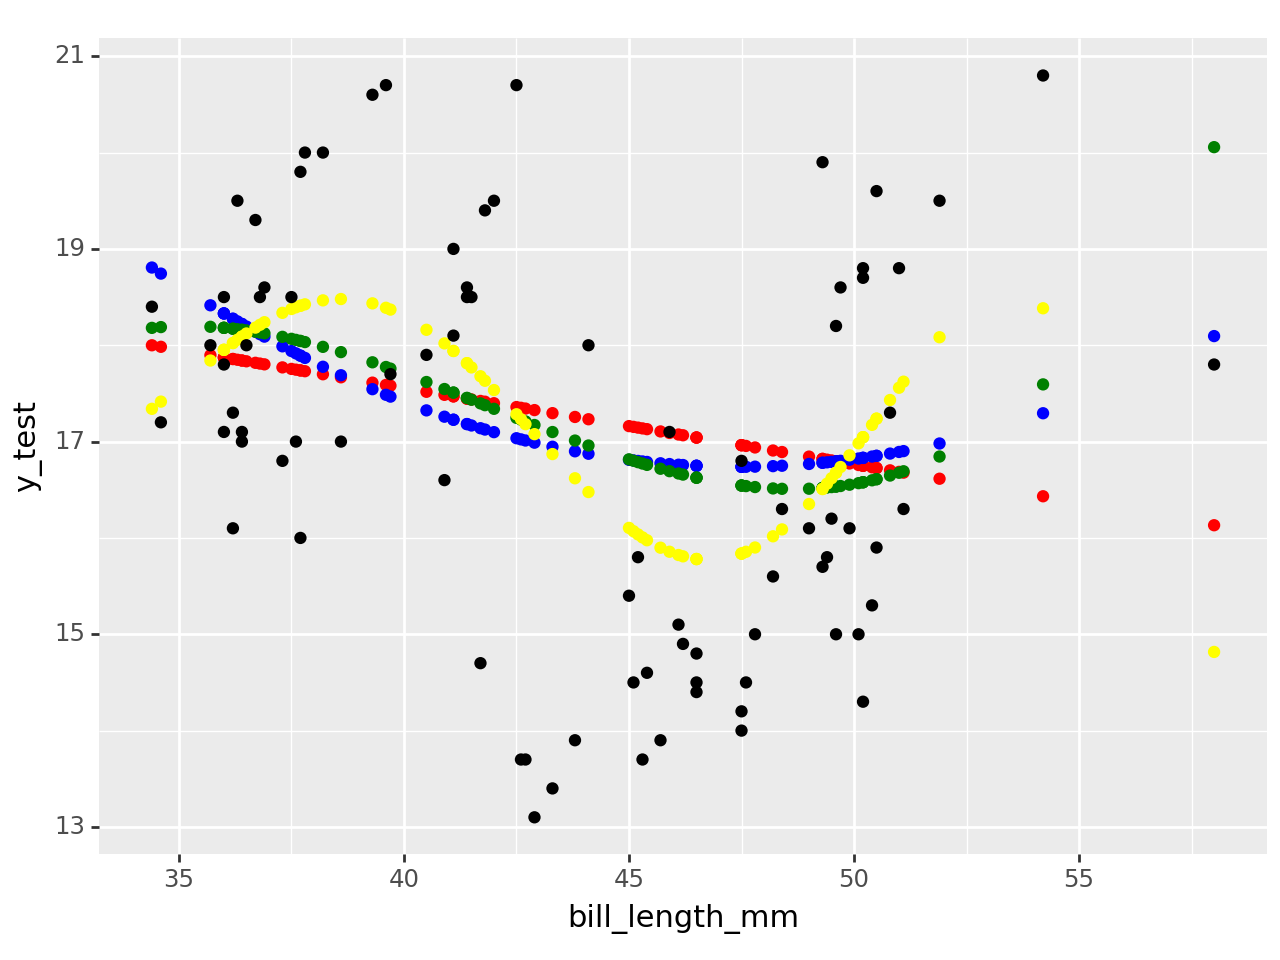

<Figure Size: (640 x 480)>

In [59]:
# Plot and compare models
(ggplot(models, aes(x = 'bill_length_mm', y = 'y_test'))
+ geom_point(aes(y = 'linear'), color = 'red')
+ geom_point(aes( y = 'quadratic'),color = 'blue')
+ geom_point(aes( y ='cubic'), color = 'green')
+ geom_point(aes( y ='degree_10'), color = 'yellow')
+ geom_point(aes(y = 'y_test'), color = 'black'))

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
  - I think linear is underfitting
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
  - I don't think any of the models are above overfitting because none of the lines perfectly follow the relationship of the actual y value points
* Which of the above models do you think fits the data best and why?
  - I think the degree 10 models fit the data best because it follows the relationship of the points the best